# Life Expectancy Data (Моделирование продолжительности жизни)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

from scipy.stats import t, norm
from scipy import stats as st
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Обработка данных

#### Обработка заголовков

In [3]:
df.columns = df.columns.str.strip()
df.columns = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_B',
       'measles', 'BMI', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'HIV/AIDS', 'GDP', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_B',
       'measles', 'BMI', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'HIV/AIDS', 'GDP', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

#### Проверка и смена типов данных 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_B                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

#### Обработка пропусков

In [5]:
df.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_B                        553
measles                              0
BMI                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
HIV/AIDS                             0
GDP                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Поскольку изначальных данных немного: удалять пропуски не хочется, а в столбцах с большим количеством пропусков (больше 30) заполнять медианой тоже не очень правильно, попытаемся заполнить пропущенные значения с помощью линейной регрессии, а именно метода MICE. 



Для оценки качества результата предполагают, что нам известны истинные значения пропусков. Сам алгоритм состоит из множества итераций.

Он работает по следующему принципу: сначала заполняют данные с помощью среднего арифметического (медианы), это отправная точка. Потом убирают одно заполненное только что значение и заполняют его через уравнение линейной регрессии с соответсвующими обучающими и тестовыми выборками. Потом вычитают заполненные после первого цикла значения из исходного датасета, в котором пропуски представляют собой среднее арифметическое по столбцам. Эти шаги повторяют (каждый раз используя новые заполненные значения в качестве отправной точки) до тех пор, пока разницы между двумя последними пропущенными значениями не будут близки к нулю.

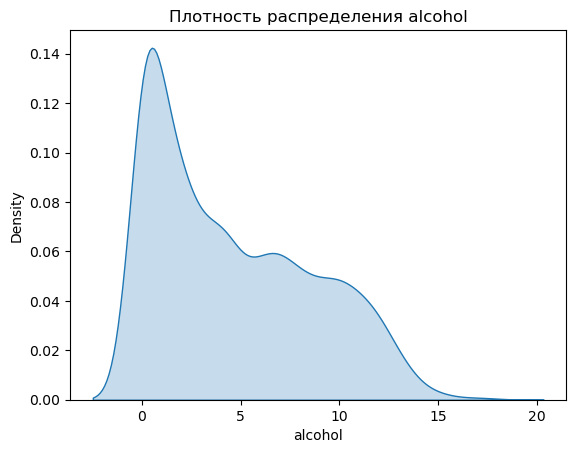

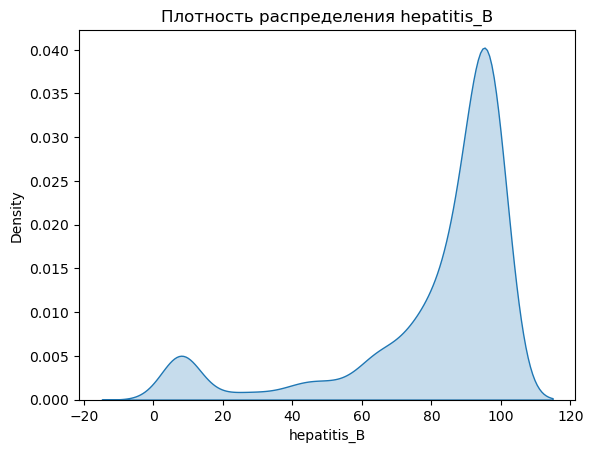

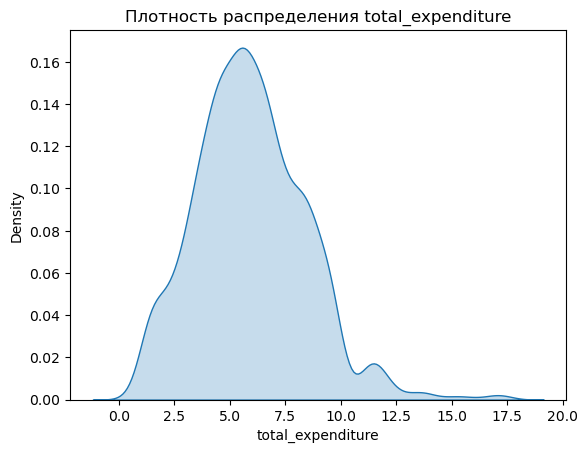

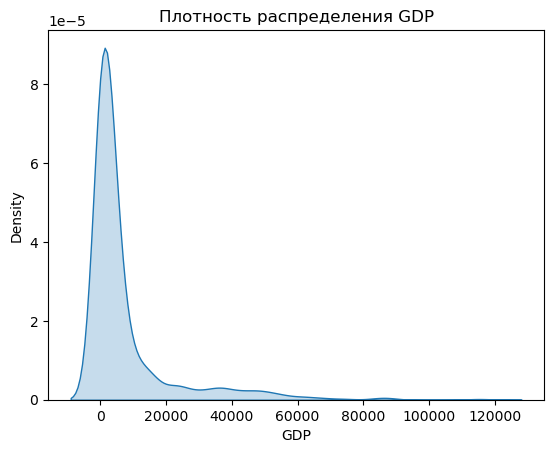

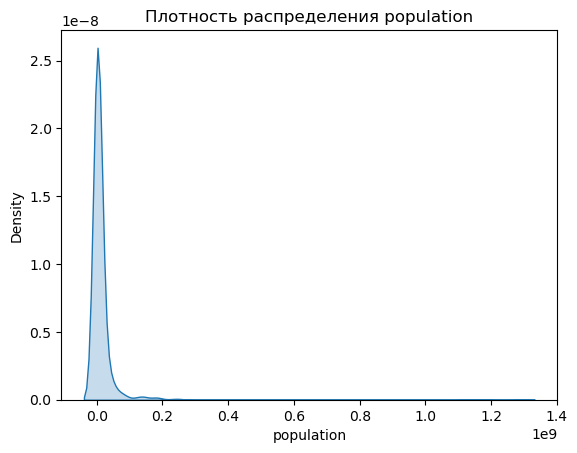

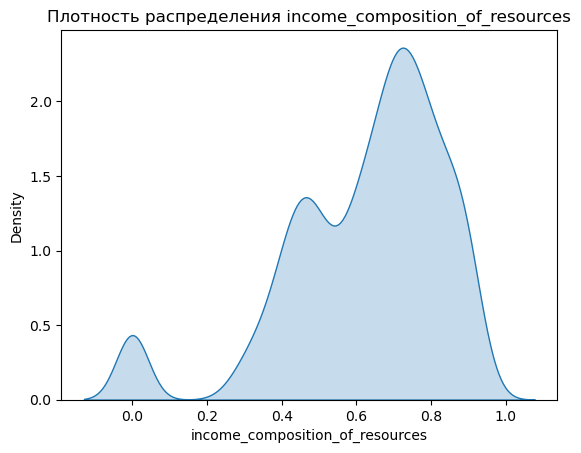

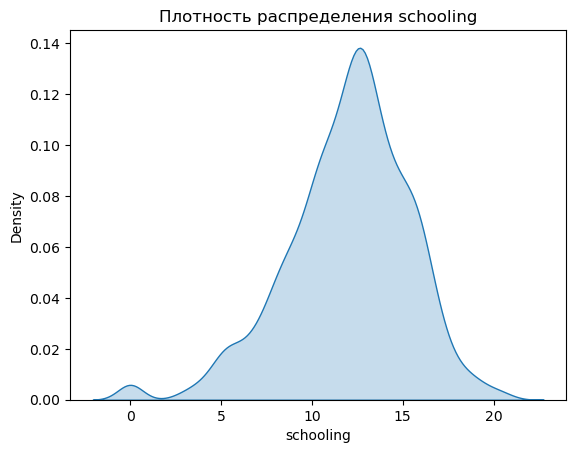

In [20]:
list_1 = ['alcohol', 'hepatitis_B', 'total_expenditure', 'GDP', 'population', 'income_composition_of_resources', 'schooling']

for i in list_1: 
    sns.kdeplot(df[i], fill=True).set(title=f'Плотность распределения {i}')
    plt.show()

In [4]:
#создадим список с датами, так как их не получиться загнать в алгоритмя для заполнения пропусков
list_11 = list(df['year'])
list_22 = list(df['country'])

In [5]:
df['status'] = df['status'].replace({'Developing':1}, regex=True)
df['status'] = df['status'].replace({'Developed':0}, regex=True)

In [6]:
#создаем срез датасета
a = df.drop('year', axis=1)
b = a.drop('country', axis=1)

In [7]:
b

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
# сделаем копию датафрейма
good_copy = b.copy()

In [9]:
# создадим объект класса StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# стандартизируем данные и сразу поместим их в датафрейм
good_copy = pd.DataFrame(scaler.fit_transform(good_copy), columns = good_copy.columns)

In [10]:
# создадим объект класса IterativeImputer и укажем необходимые параметры
good_imputer = IterativeImputer(initial_strategy = 'median', # вначале заполним пропуски медианой
                                estimator = LinearRegression(), # в качестве модели используем линейную регрессию
                                random_state = 42 # добавим точку отсчета
                                )
 
# используем метод .fit_transform() для заполнения пропусков в датасете good_copy
good_copy = good_imputer.fit_transform(good_copy)
 
# вернем данные к исходному масштабу и округлим столбец kitchen_area
good_copy = pd.DataFrame(scaler.inverse_transform(good_copy), columns = b.columns)
good_copy['status'] = good_copy['status'].round(0)
good_copy['life_expectancy'] = good_copy['life_expectancy'].round(0)
good_copy['adult_mortality'] = good_copy['adult_mortality'].round(0)
good_copy['infant_deaths'] = good_copy['infant_deaths'].round(0)
good_copy['percentage_expenditure'] = good_copy['percentage_expenditure'].round(0)
good_copy['hepatitis_B'] = good_copy['hepatitis_B'].round(0)
good_copy['measles'] = good_copy['measles'].round(0)
good_copy.head(7)

C:\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,HIV/AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,1.0,59.0,279.0,74.0,0.01,80.0,66.0,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,1.0,59.0,281.0,77.0,0.01,57.0,63.0,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [11]:
df = good_copy
df['year'] = list_11
df['country'] = list_22
df

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,...,diphtheria,HIV/AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,year,country
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015,Afghanistan
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2014,Afghanistan
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2013,Afghanistan
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2012,Afghanistan
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2011,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.0,723.0,27.0,4.36,0.0,68.0,31.0,27.1,42.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,2004,Zimbabwe
2934,1.0,44.0,715.0,26.0,4.06,0.0,7.0,998.0,26.7,41.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2003,Zimbabwe
2935,1.0,45.0,73.0,25.0,4.43,0.0,73.0,304.0,26.3,40.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,2002,Zimbabwe
2936,1.0,45.0,686.0,25.0,1.72,0.0,76.0,529.0,25.9,39.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2001,Zimbabwe


In [12]:
df.isna().sum()

status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_B                        0
measles                            0
BMI                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
HIV/AIDS                           0
GDP                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
year                               0
country                            0
dtype: int64

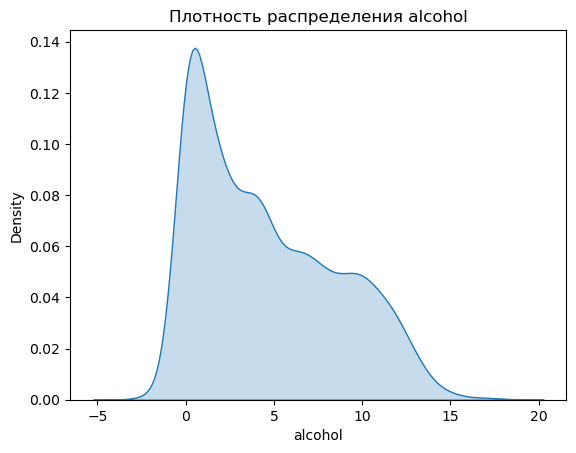

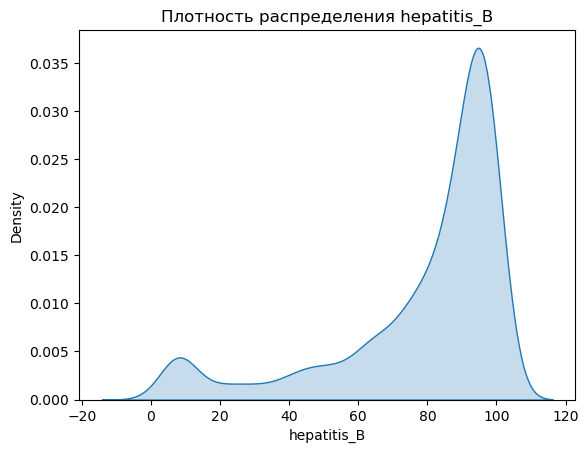

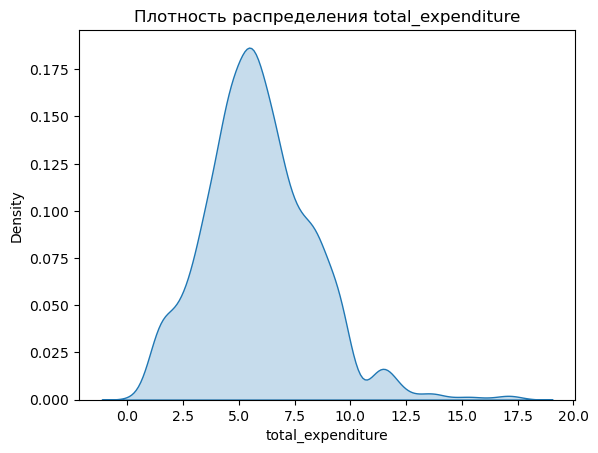

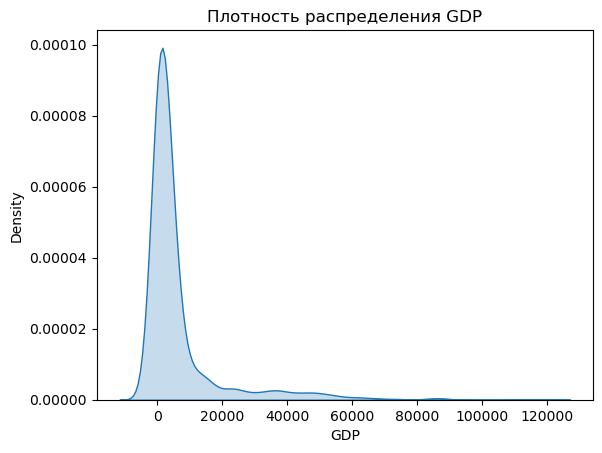

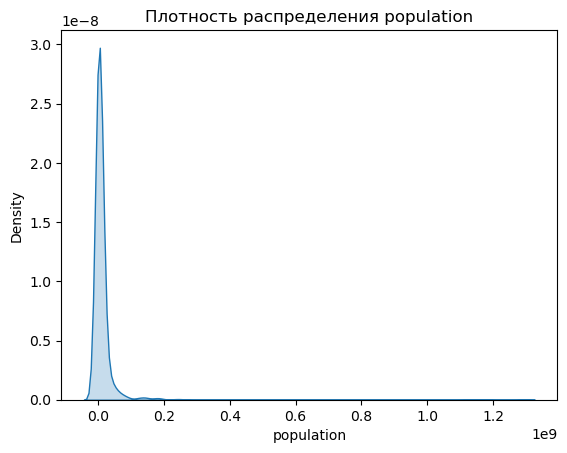

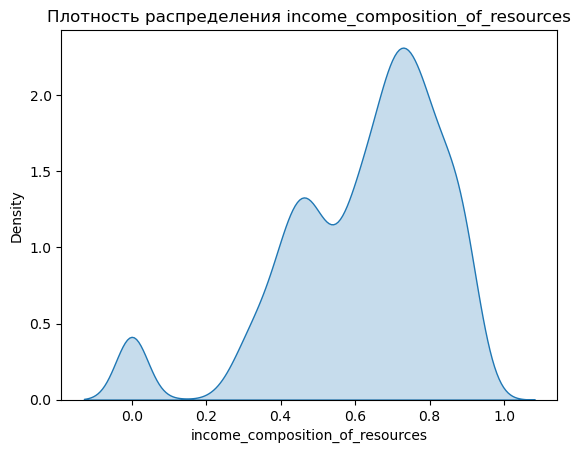

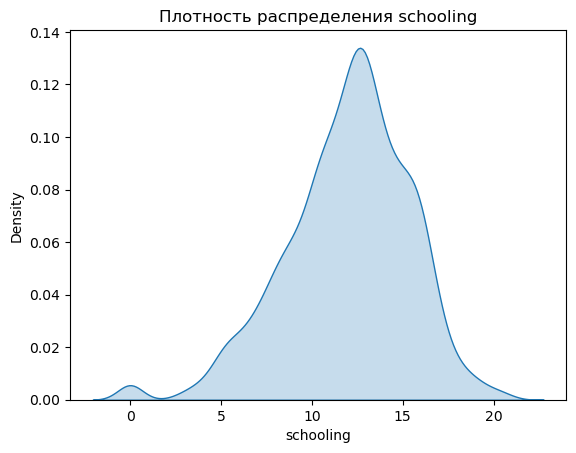

In [32]:
list_1 = ['alcohol', 'hepatitis_B', 'total_expenditure', 'GDP', 'population', 'income_composition_of_resources', 'schooling']

for i in list_1: 
    sns.kdeplot(df[i], fill=True).set(title=f'Плотность распределения {i}')
    plt.show()

В целом, плотность рапределения не изменилась - пропуски заполнены хорошо. 

#### Проверка на наличие дубликатов

In [33]:
df.duplicated().sum()

0

#### Работа с выбросами

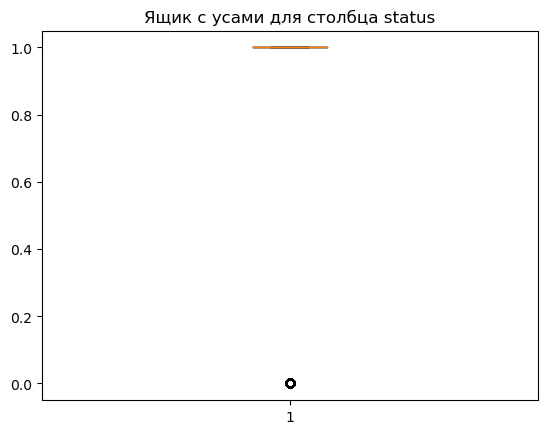

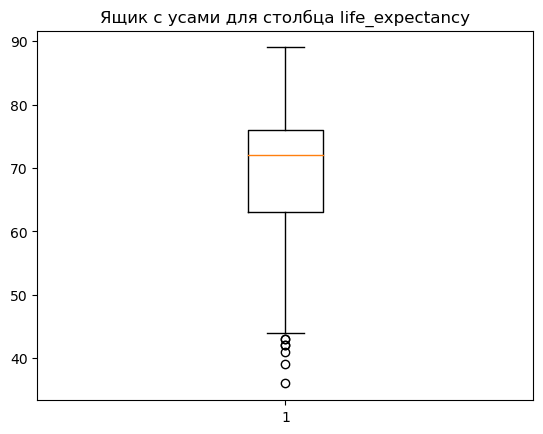

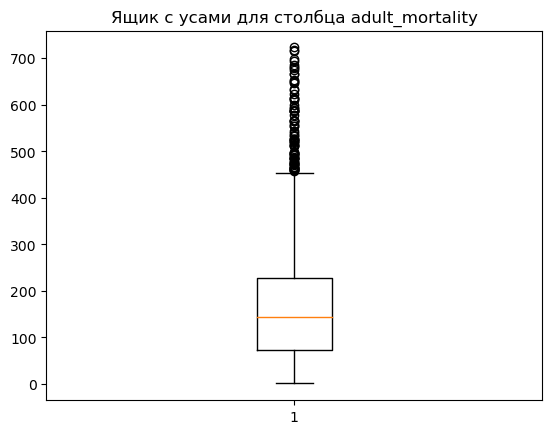

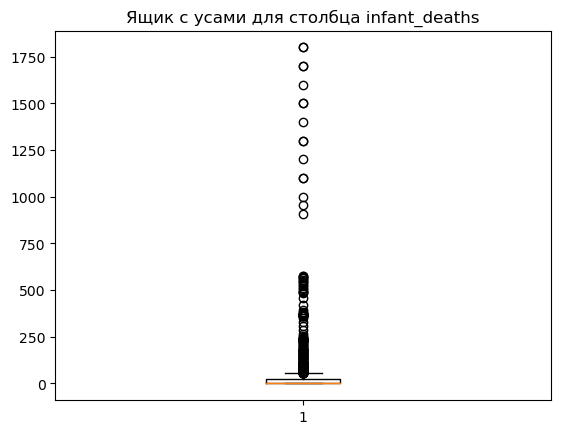

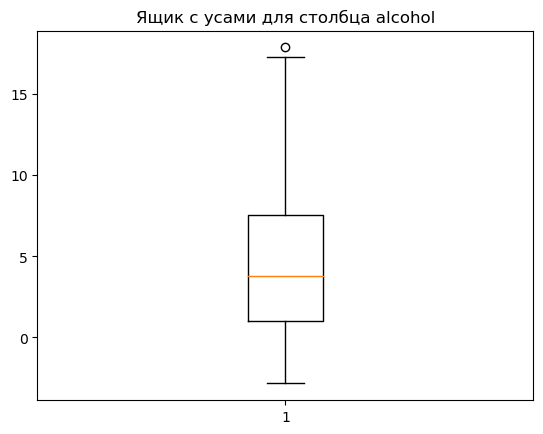

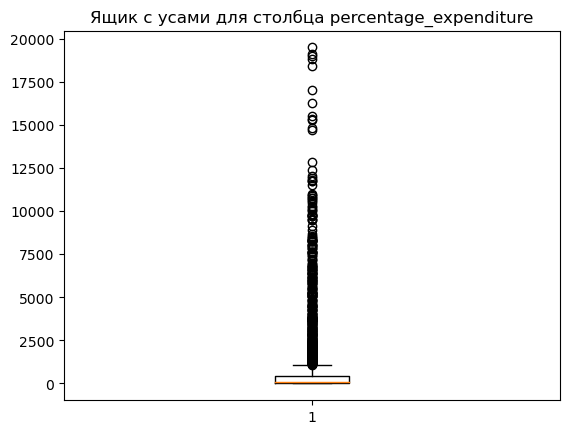

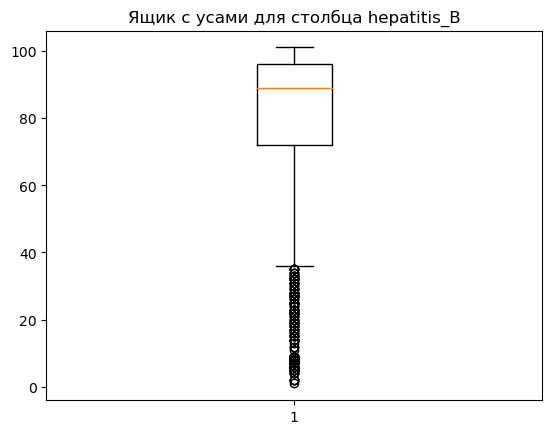

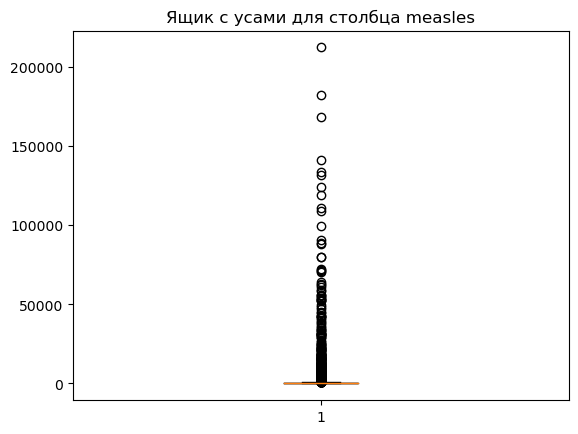

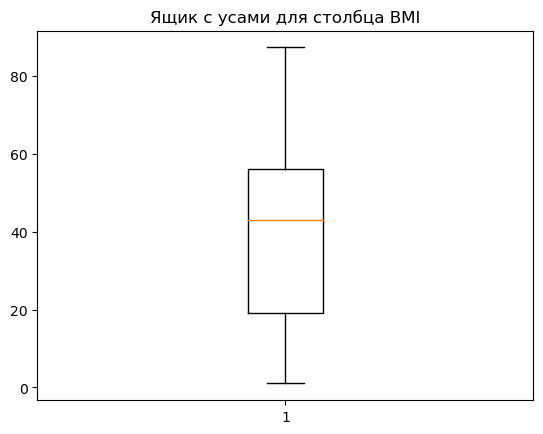

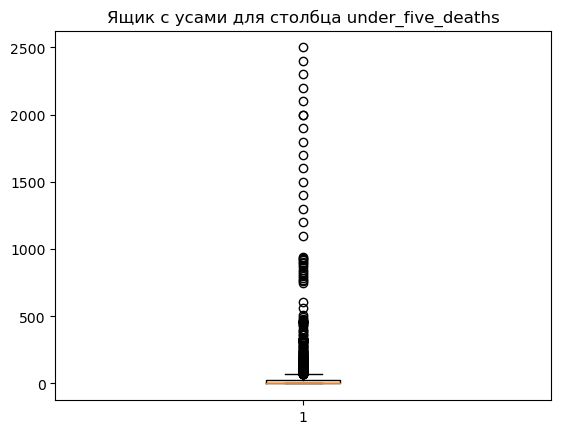

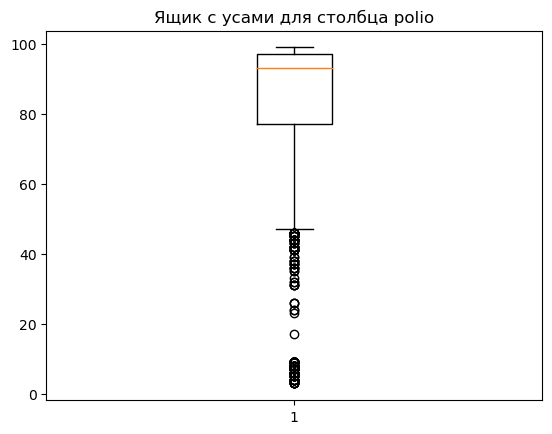

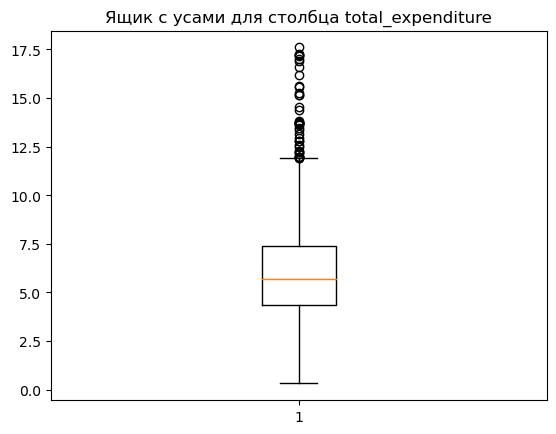

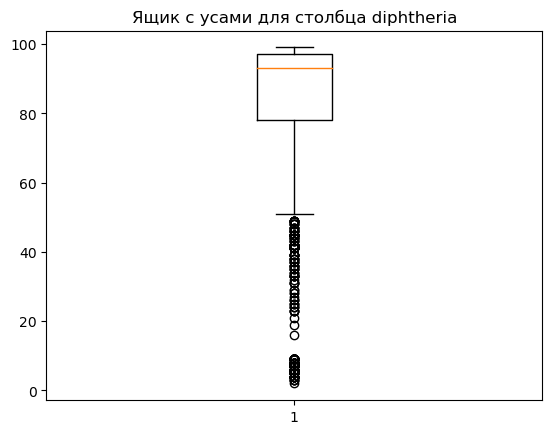

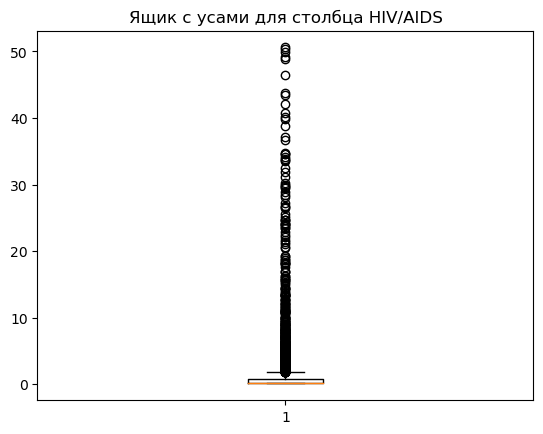

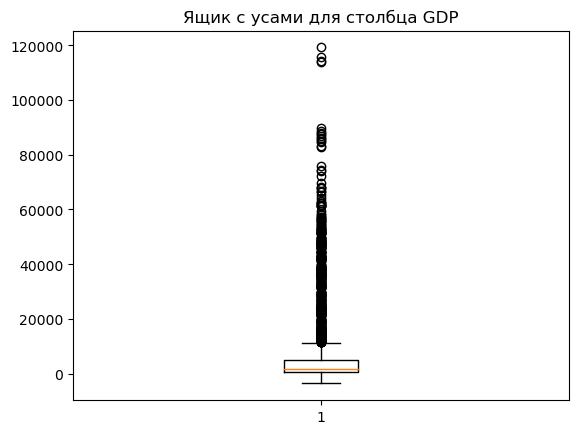

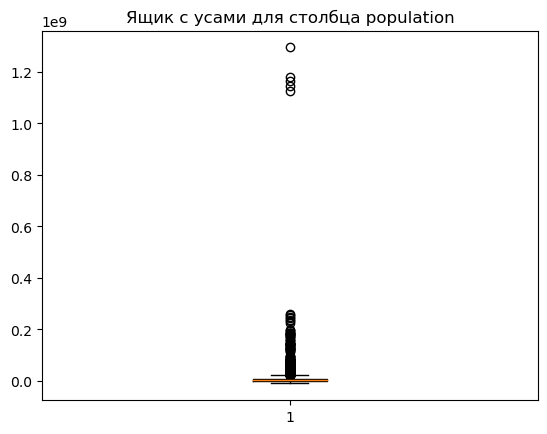

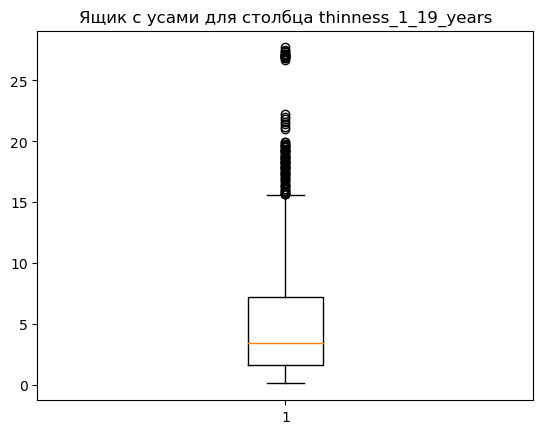

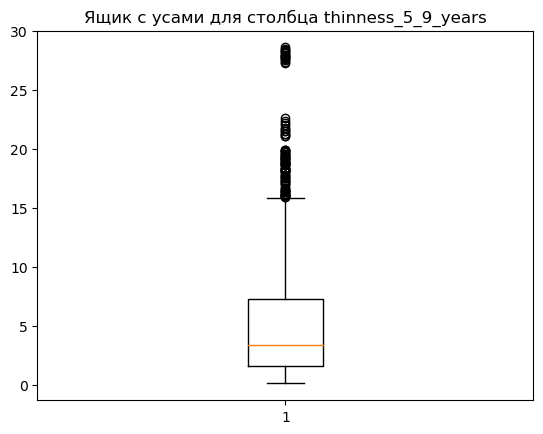

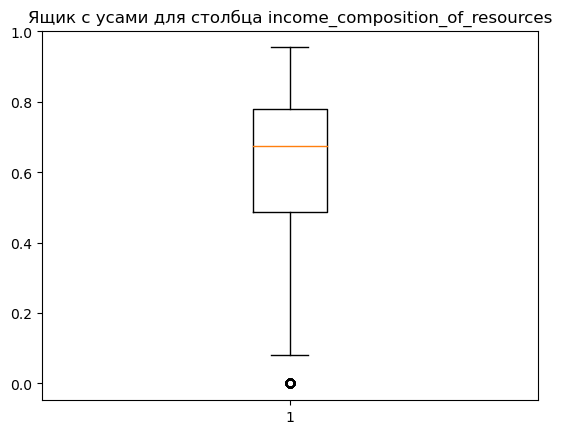

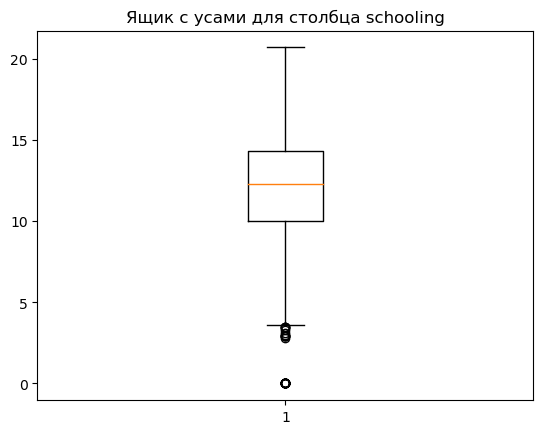

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

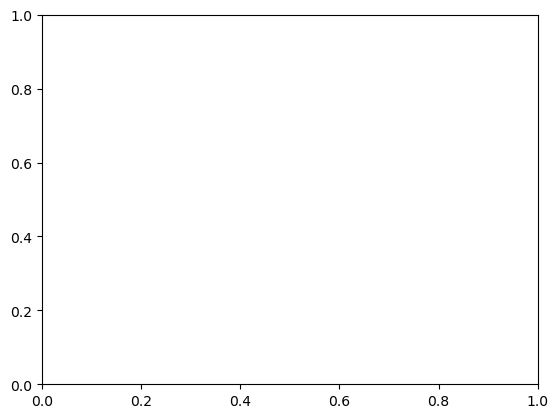

In [34]:
for i in df.columns:
    plt.boxplot(df[i]) #строим боксплоты
    plt.title(f'Ящик с усами для столбца {i}')
    plt.show()

In [83]:
list_2 = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'percentage_expenditure', 'hepatitis_B', 'measles',
         'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'HIV/AIDS', 'GDP','population', 'thinness_1_19_years',
         'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

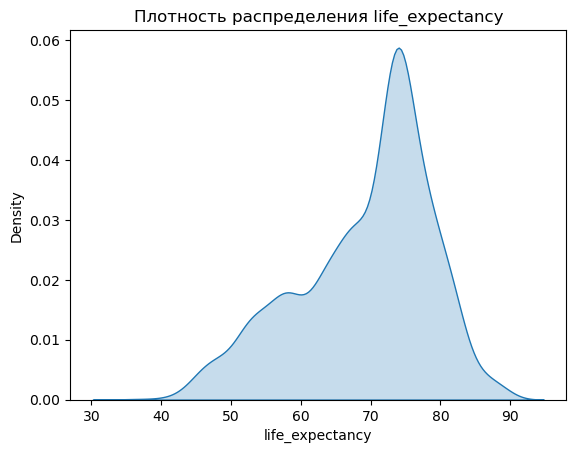

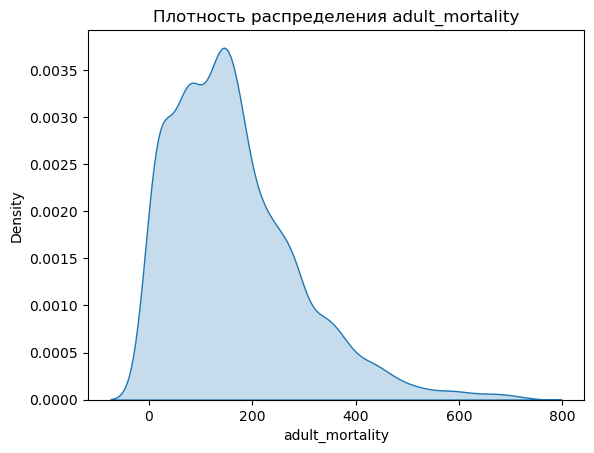

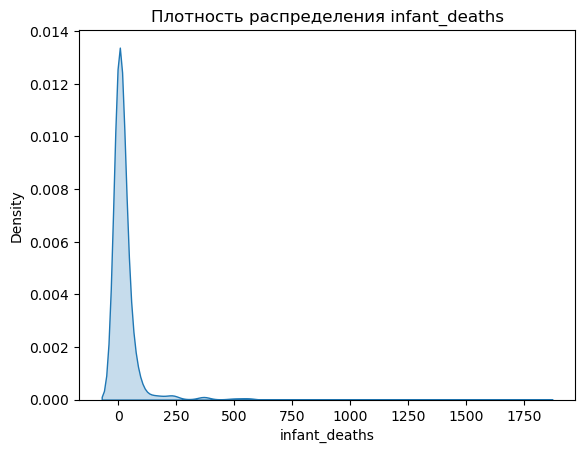

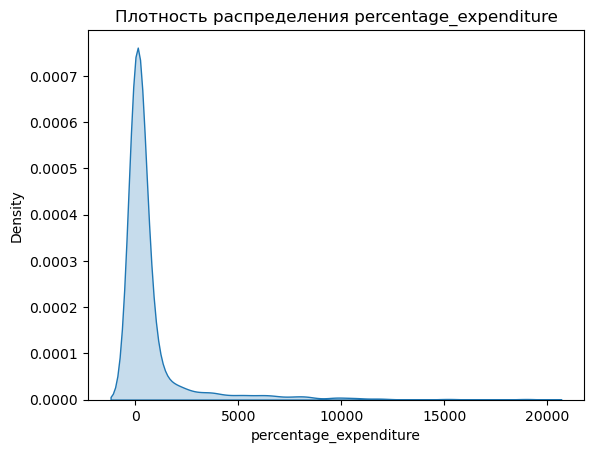

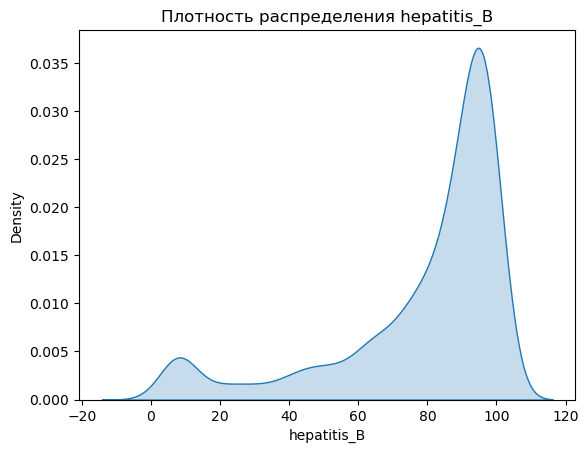

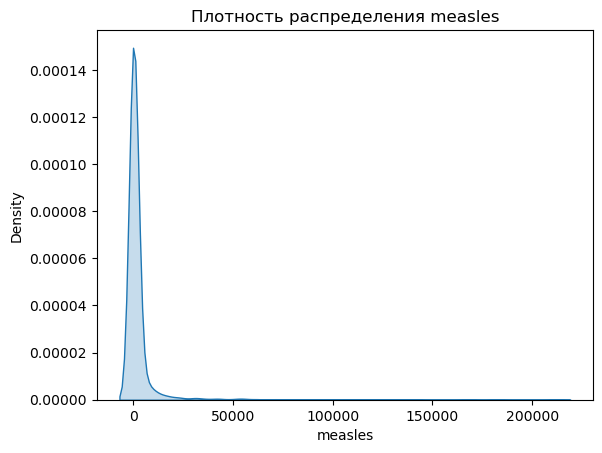

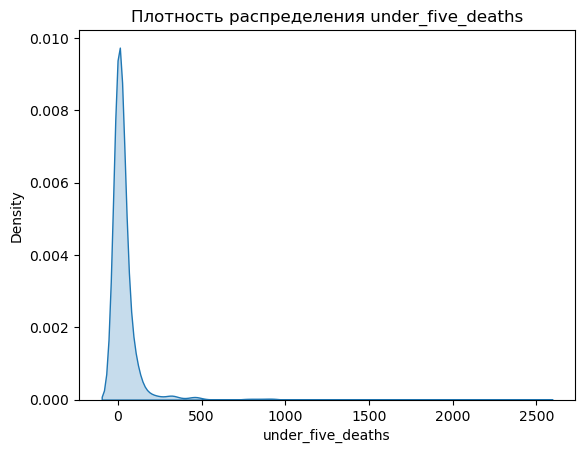

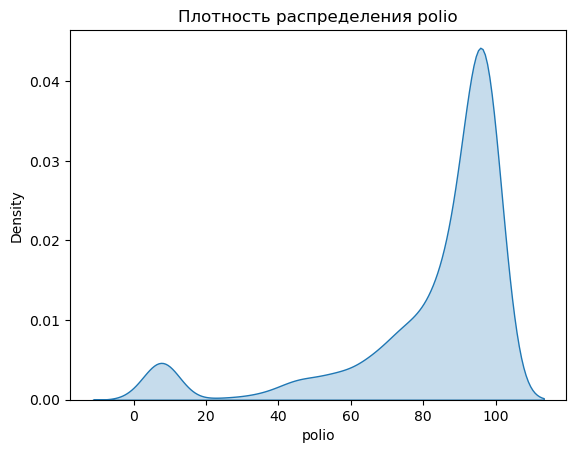

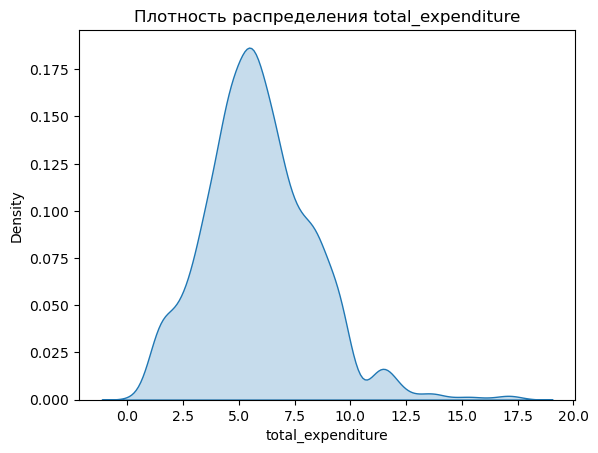

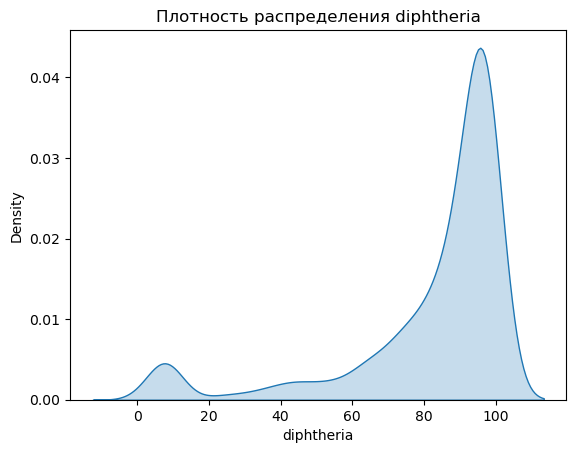

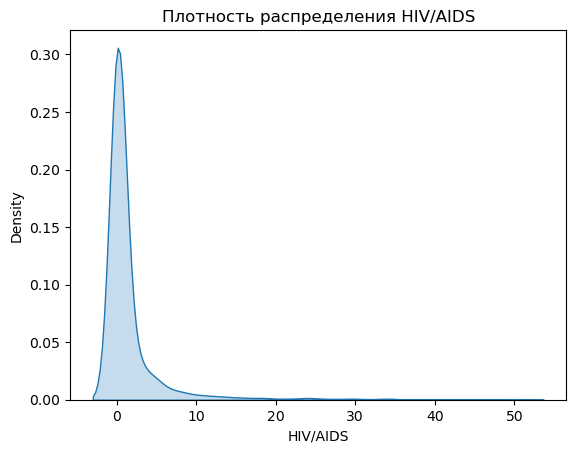

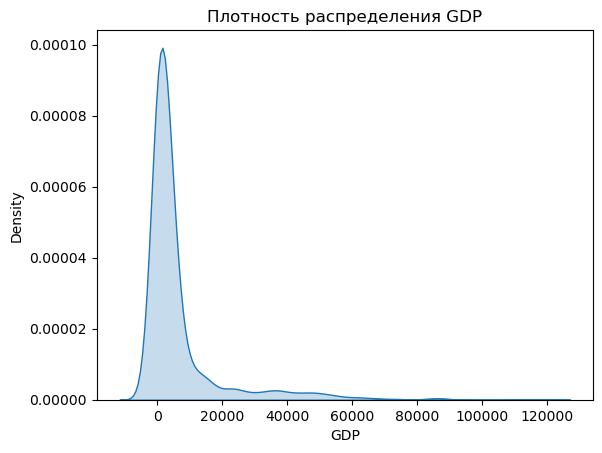

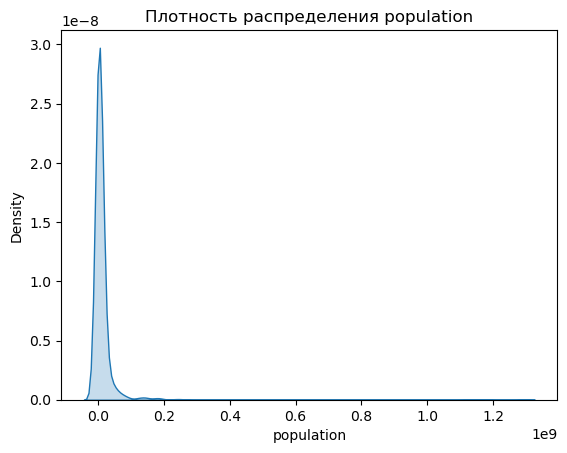

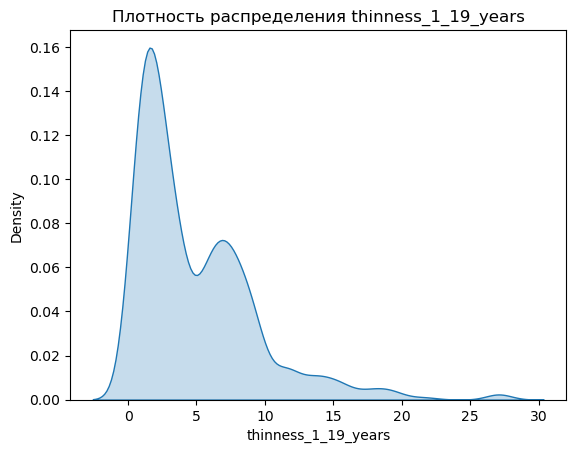

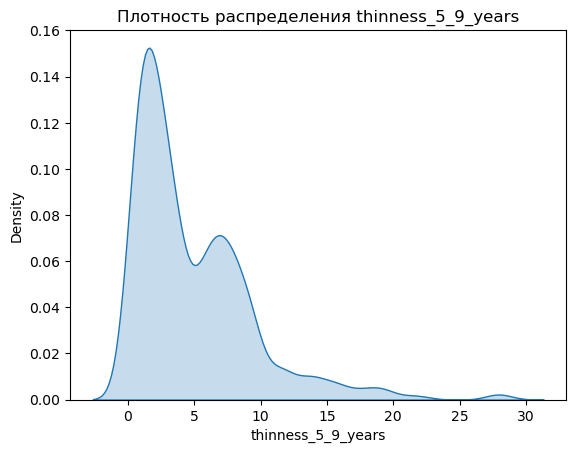

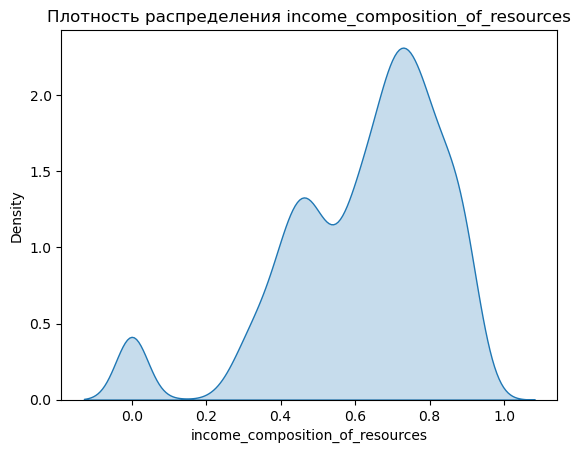

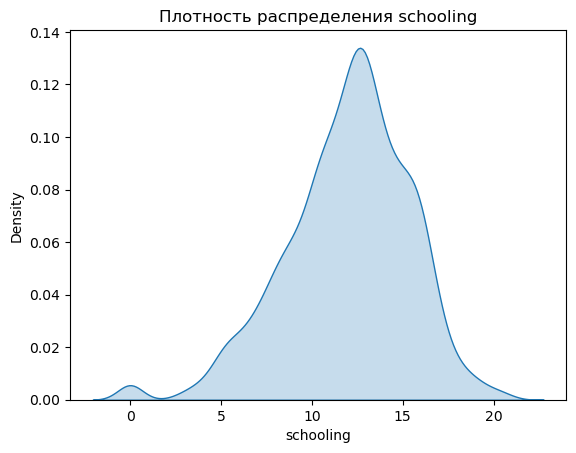

In [37]:
for i in list_2: 
    sns.kdeplot(df[i], fill=True).set(title=f'Плотность распределения {i}')
    plt.show()

In [84]:
def iqrr(df, columns):
    mu = df[columns].mean()
    sigma = df[columns].std()
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
    good_df = df[~((df[columns] < ej_l) | (df[columns] > ej_h)).any(axis=1)]
    return good_df


columnss = list_2
good_df = iqrr(df, columnss)

In [13]:
good_df = df
good_df 

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,...,diphtheria,HIV/AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,year,country
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015,Afghanistan
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2014,Afghanistan
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2013,Afghanistan
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2012,Afghanistan
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2011,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.0,723.0,27.0,4.36,0.0,68.0,31.0,27.1,42.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,2004,Zimbabwe
2934,1.0,44.0,715.0,26.0,4.06,0.0,7.0,998.0,26.7,41.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2003,Zimbabwe
2935,1.0,45.0,73.0,25.0,4.43,0.0,73.0,304.0,26.3,40.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,2002,Zimbabwe
2936,1.0,45.0,686.0,25.0,1.72,0.0,76.0,529.0,25.9,39.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2001,Zimbabwe


## Построение регрессии

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

#### На всех факторах без учета стран и с выбросами

In [15]:
X = df.drop(["life_expectancy", 'country'], axis=1)
y = df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [17]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet
 

model_1 = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Здесь alpha это коэффициент регуляризации, l1_ratio определяет пропорцию L1 к общему штрафу (0.5 означает одинаковый вес для L1 и L2)

# обучим нашу модель
model_1.fit(train_X_st, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X_st)

[-0.34336387 -2.10041002  0.         -0.          0.27332195  0.
 -0.18919993  0.63896398 -0.13524278  0.50074195  0.          0.6824645
 -2.46206817  0.36411622  0.         -0.2230041  -0.04984822  1.75630057
  2.56305936 -0.03477235] [69.4847561]


In [18]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_1 = mean_squared_error(test_y, predictions)
rmse_1 = mean_squared_error(test_y, predictions, squared=False)
mape_1 = mean_absolute_percentage_error(test_y, predictions)
r2_1 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_1)
print("Среднеквадратическая ошибка (RMSE):", rmse_1)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_1 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_1)

Среднеквадратическая ошибка (MSE): 15.577848838382518
Среднеквадратическая ошибка (RMSE): 3.9468783663019713
Средняя абсолютная ошибка  (MAPE): 4.47 %
Коэффициент детерминации (R^2): 0.8313792153831927


C:\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
X = good_df.drop(["life_expectancy", 'country'], axis=1)
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [21]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
# создадим объект этого класса и запишем в переменную model
model_2 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# обучим нашу модель
model_2.fit(train_X_st, train_y)
print(model_2.coef_, model_2.intercept_)
predictions = model_2.predict(test_X_st)

[-0.34336387 -2.10041002  0.         -0.          0.27332195  0.
 -0.18919993  0.63896398 -0.13524278  0.50074195  0.          0.6824645
 -2.46206817  0.36411622  0.         -0.2230041  -0.04984822  1.75630057
  2.56305936 -0.03477235] [69.4847561]


In [22]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_2 = mean_squared_error(test_y, predictions)
rmse_2 = mean_squared_error(test_y, predictions, squared=False)
mape_2 = mean_absolute_percentage_error(test_y, predictions)
r2_2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_2)
print("Среднеквадратическая ошибка (RMSE):", rmse_2)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_2 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_2)

Среднеквадратическая ошибка (MSE): 15.577848838382518
Среднеквадратическая ошибка (RMSE): 3.9468783663019713
Средняя абсолютная ошибка  (MAPE): 4.47 %
Коэффициент детерминации (R^2): 0.8313792153831927


C:\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Будем строить на очищенных данных, так как детерминация не сильно больше в регрессии с выбросами, а MAPE получается поменьше в этом случае. Видим, что много факторов, которые коррелируют друг с другом, поэтоу попробуем отобрать факторы, либо же использовать метод РСА для создания для таких факторов общего признака. 

### Отбор факторов в модель

#### На основе тепловой карты 

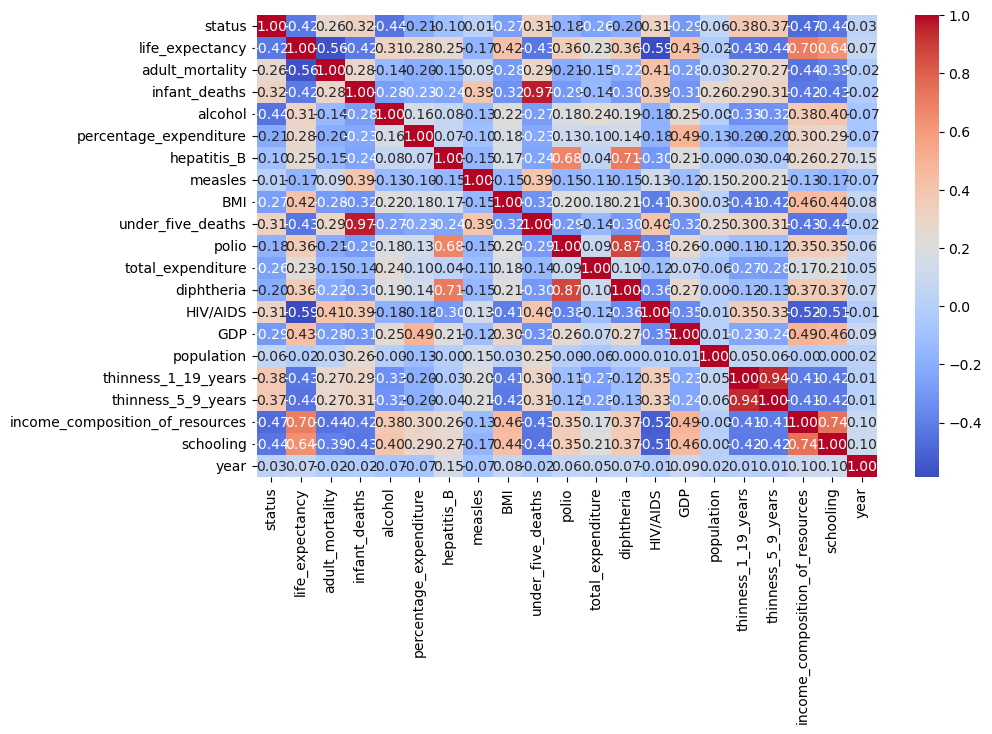

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(good_df.corr(method='kendall'), annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [23]:
X = good_df[['status', 'adult_mortality','infant_deaths', 'alcohol',
       'percentage_expenditure', 'BMI', 'diphtheria', 'HIV/AIDS']]
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [25]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
# создадим объект этого класса и запишем в переменную model
model_3 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# обучим нашу модель
model_3.fit(train_X_st, train_y)
print(model_3.coef_, model_3.intercept_)
predictions = model_3.predict(test_X_st)

[-1.03293001 -3.01742489 -0.42685665  0.98353101  0.95984855  1.93898247
  1.84009626 -2.45515367] [69.4847561]


In [26]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_3 = mean_squared_error(test_y, predictions)
rmse_3 = mean_squared_error(test_y, predictions, squared=False)
mape_3 = mean_absolute_percentage_error(test_y, predictions)
r2_3 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_3)
print("Среднеквадратическая ошибка (RMSE):", rmse_3)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_3 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_3)

Среднеквадратическая ошибка (MSE): 22.929717414906964
Среднеквадратическая ошибка (RMSE): 4.788498450966332
Средняя абсолютная ошибка  (MAPE): 5.56 %
Коэффициент детерминации (R^2): 0.7517996880277379


C:\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Отбор по тепловой карте результатов особых не дал, попробуем другими способами. 

In [27]:
X = good_df.drop(["life_expectancy", 'country'], axis=1)
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

#### РСА

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(whiten=True)
pca.fit(train_X_st)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.31098623, 0.43782418, 0.53265169, 0.60131129, 0.66595205,
       0.71721177, 0.75967298, 0.79946377, 0.83766308, 0.86809004,
       0.89396444, 0.91508881, 0.93521885, 0.95389422, 0.96995374,
       0.98339746, 0.99193408, 0.99666593, 0.99985181, 1.        ])

In [31]:
pca = PCA(n_components=16, whiten=True) 
pca = pca.fit(train_X_st)
X_train = pca.transform(train_X_st)
X_test = pca.transform(test_X_st)

In [32]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, train_y)
predictions = model.predict(X_test)
mape = mean_absolute_percentage_error(test_y, predictions)
print(f"R2 на train: {model.score(X_train, train_y)}")
print(f"R2 на test: {model.score(X_test, test_y)}")
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')

R2 на train: 0.8208864188047578
R2 на test: 0.8253786907515048
Средняя абсолютная ошибка  (MAPE): 4.55 %


#### Шепли

In [33]:
import shap

In [34]:
reg = LinearRegression().fit(train_X, train_y)

In [35]:
explainer = shap.Explainer(reg, train_X)

In [36]:
shap_values = explainer(test_X)

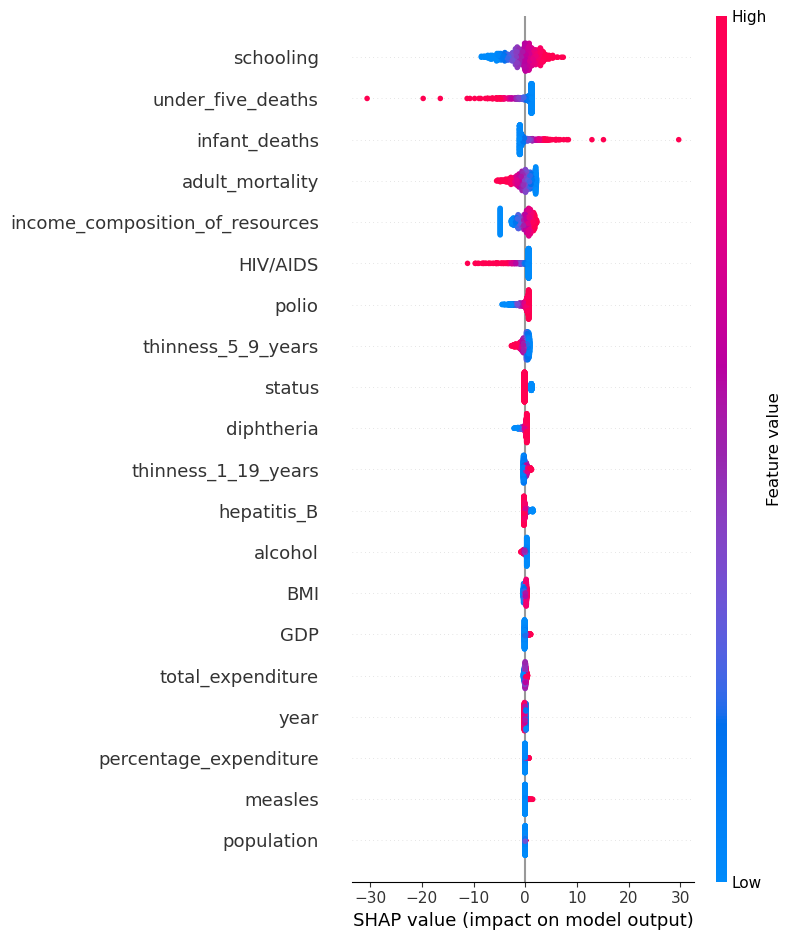

In [109]:
shap.summary_plot(shap_values, test_X)

In [37]:
X = good_df[['schooling', 'adult_mortality', 'income_composition_of_resources','HIV/AIDS', 'polio']]
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [39]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
# создадим объект этого класса и запишем в переменную model
model_4 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# обучим нашу модель
model_4.fit(train_X_st, train_y)
print(model_4.coef_, model_4.intercept_)
predictions = model_4.predict(test_X_st)

[ 3.23466024 -2.26049061  2.15391767 -2.50201029  0.93818882] [69.4847561]


In [40]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_4 = mean_squared_error(test_y, predictions)
rmse_4 = mean_squared_error(test_y, predictions, squared=False)
mape_4 = mean_absolute_percentage_error(test_y, predictions)
r2_4 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_4)
print("Среднеквадратическая ошибка (RMSE):", rmse_4)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_4 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_4)

Среднеквадратическая ошибка (MSE): 17.389427910714456
Среднеквадратическая ошибка (RMSE): 4.1700632981664025
Средняя абсолютная ошибка  (MAPE): 4.67 %
Коэффициент детерминации (R^2): 0.8117699684492163


'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


#### Значение Шепли на основе полиномиальных признаков 

In [41]:
X = good_df.select_dtypes(include=['float64', 'int64'])
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# Создаем экземпляр класса PolynomialFeatures для создания полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)

# Преобразуем исходные признаки в полиномиальные признаки
poly_features = poly.fit_transform(X)

# Создаем новый датафрейм с полиномиальными признаками
poly_column_names = poly.get_feature_names_out(X.columns)
df_poly = pd.DataFrame(poly_features, columns=poly_column_names)

In [44]:
df_combined = df_poly

In [45]:
df_combined = df_combined.T.drop_duplicates().T
df_combined

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,...,thinness_5_9_years^2,thinness_5_9_years income_composition_of_resources,thinness_5_9_years schooling,thinness_5_9_years year,income_composition_of_resources^2,income_composition_of_resources schooling,income_composition_of_resources year,schooling^2,schooling year,year^2
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,...,299.29,8.2867,174.73,34859.5,0.229441,4.8379,965.185,102.01,20351.5,4060225.0
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,...,306.25,8.3300,175.00,35245.0,0.226576,4.7600,958.664,100.00,20140.0,4056196.0
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,...,313.29,8.3190,175.23,35630.1,0.220900,4.6530,946.110,98.01,19928.7,4052169.0
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,...,324.00,8.3340,176.40,36216.0,0.214369,4.5374,931.556,96.04,19717.6,4048144.0
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,...,331.24,8.2628,172.90,36600.2,0.206116,4.3130,912.994,90.25,19104.5,4044121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.0,723.0,27.0,4.36,0.0,68.0,31.0,27.1,42.0,...,88.36,3.8258,86.48,18837.6,0.165649,3.7444,815.628,84.64,18436.8,4016016.0
2934,1.0,44.0,715.0,26.0,4.06,0.0,7.0,998.0,26.7,41.0,...,98.01,4.1382,94.05,19829.7,0.174724,3.9710,837.254,90.25,19028.5,4012009.0
2935,1.0,45.0,73.0,25.0,4.43,0.0,73.0,304.0,26.3,40.0,...,1.69,0.5551,13.00,2602.6,0.182329,4.2700,854.854,100.00,20020.0,4008004.0
2936,1.0,45.0,686.0,25.0,1.72,0.0,76.0,529.0,25.9,39.0,...,2.89,0.7259,16.66,3401.7,0.182329,4.1846,854.427,96.04,19609.8,4004001.0


In [46]:
X = df_combined.drop(df_combined.filter(like='life_expectancy', axis=1).columns, axis=1)
y = df_combined[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [48]:
reg = LinearRegression().fit(train_X_st, train_y)

In [49]:
explainer = shap.Explainer(reg, train_X_st)

In [50]:
shap_values = explainer(test_X_st)

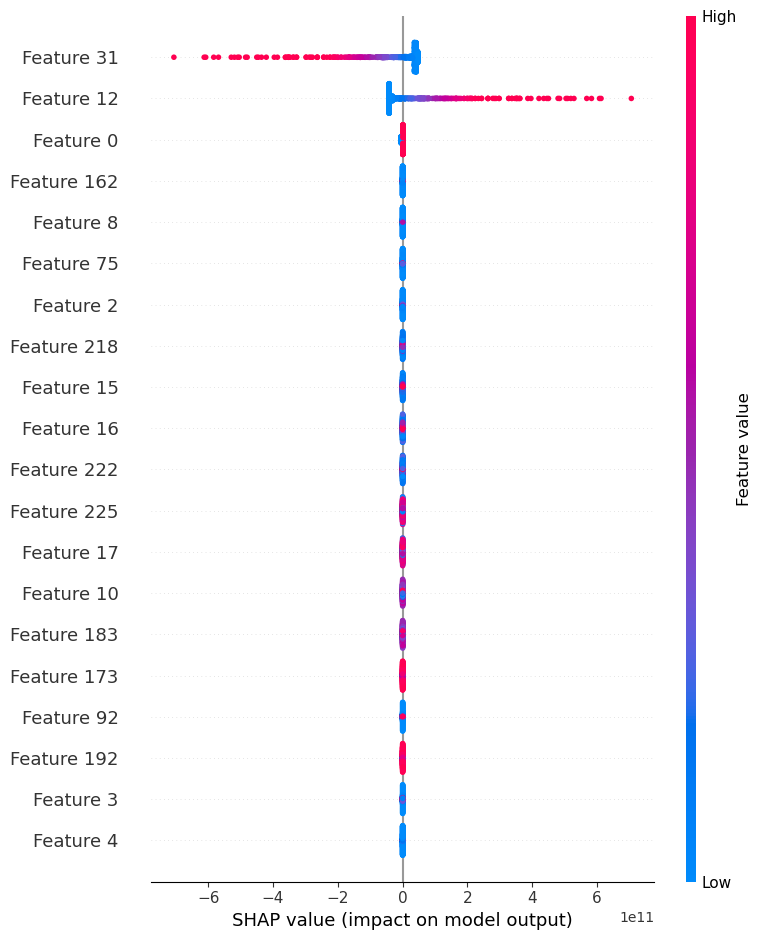

In [124]:
shap.summary_plot(shap_values, test_X_st)

In [51]:
column_numbers = [31, 12, 0, 162, 75, 218, 222, 225, 183]
X = df_combined.iloc[:, column_numbers]
y = df_combined[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [53]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import ElasticNet
 
# создадим объект этого класса и запишем в переменную model
model_5 = Ridge()

# обучим нашу модель
model_5.fit(train_X_st, train_y)
print(model_5.coef_, model_5.intercept_)
predictions = model_5.predict(test_X_st)

[[ 0.58508427  1.65028998 -2.59281794  1.76700388 -2.96672506  2.67867833
  -5.27895093  1.13748781  0.03112093]] [69.4847561]


In [54]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_5 = mean_squared_error(test_y, predictions)
rmse_5 = mean_squared_error(test_y, predictions, squared=False)
mape_5 = mean_absolute_percentage_error(test_y, predictions)
r2_5 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_5)
print("Среднеквадратическая ошибка (RMSE):", rmse_5)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_5 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_5)

Среднеквадратическая ошибка (MSE): 25.170625169828565
Среднеквадратическая ошибка (RMSE): 5.017033502960546
Средняя абсолютная ошибка  (MAPE): 5.97 %
Коэффициент детерминации (R^2): 0.7275432179715037


'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


#### Попробуем закодировать страны

In [55]:
good_df = pd.get_dummies(good_df, columns=['country'],  drop_first=True)
good_df

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,...,country_United Republic of Tanzania,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.0,723.0,27.0,4.36,0.0,68.0,31.0,27.1,42.0,...,0,0,0,0,0,0,0,0,0,1
2934,1.0,44.0,715.0,26.0,4.06,0.0,7.0,998.0,26.7,41.0,...,0,0,0,0,0,0,0,0,0,1
2935,1.0,45.0,73.0,25.0,4.43,0.0,73.0,304.0,26.3,40.0,...,0,0,0,0,0,0,0,0,0,1
2936,1.0,45.0,686.0,25.0,1.72,0.0,76.0,529.0,25.9,39.0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
X = good_df.drop(["life_expectancy"], axis=1)
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [58]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
 
# создадим объект этого класса и запишем в переменную model
model_6 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# обучим нашу модель
model_6.fit(train_X_st, train_y)
print(model_6.coef_, model_6.intercept_)
predictions = model_6.predict(test_X_st)

[-0.89705126 -0.89256268 -0.          0.01074933  0.09207918  0.09788919
 -0.10586085  0.39404616 -0.11402828  0.34479555 -0.          0.36006471
 -2.15565373  0.3345637  -0.         -0.39191361 -0.3343911   1.12739521
  2.40923898  0.24370045  0.15861648  0.12093577 -0.80318513  0.53347274
 -0.          0.09418027 -0.05422963  0.19764032  0.          0.09380814
  0.08654986  0.27476699  0.         -0.14371808  0.1245302  -0.07984685
 -0.34959848  0.12543465 -0.20177589  0.38033602 -0.30464213  0.
  0.16093393 -0.17779914 -0.24663839 -0.34052042  0.10131722 -0.
 -0.52516738  0.31949086 -0.53403867 -0.48411568  0.26544528  0.27649535
  0.13885517 -0.10776172 -0.15938454  0.          0.48458154 -0.
  0.25308547  0.17282104 -0.06020564 -0.46452262 -0.         -0.31431128
 -0.02836247 -0.          0.          0.05688972  0.15004519  0.
  0.         -0.28436558  0.         -0.         -0.04065841 -0.24233181
  0.19587542  0.32955627 -0.13567037 -0.28374547  0.12188413  0.09451805
 -0.184819

In [59]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse_6 = mean_squared_error(test_y, predictions)
rmse_6 = mean_squared_error(test_y, predictions, squared=False)
mape_6 = mean_absolute_percentage_error(test_y, predictions)
r2_6 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_6)
print("Среднеквадратическая ошибка (RMSE):", rmse_6)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_6 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_6)

Среднеквадратическая ошибка (MSE): 6.367774701075858
Среднеквадратическая ошибка (RMSE): 2.5234450065487573
Средняя абсолютная ошибка  (MAPE): 2.59 %
Коэффициент детерминации (R^2): 0.9310726931877229


'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


#### РСА для закодированных стран

In [60]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

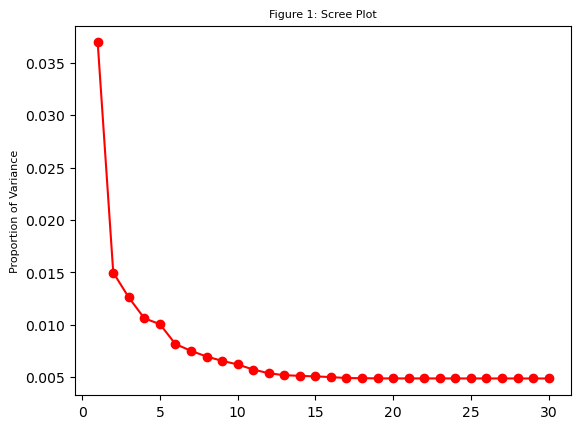

In [317]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [61]:
pca = PCA(n_components=10, whiten=True) 
pca = pca.fit(train_X_st)
X_train = pca.transform(train_X_st)
X_test = pca.transform(test_X_st)

In [62]:
model_7 = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_7.fit(X_train, train_y)
predictions = model_7.predict(X_test)
mape_7 = mean_absolute_percentage_error(test_y, predictions)
r2_7 = r2_score(test_y, predictions)

In [63]:
print("Коэффициент детерминации (R^2):", r2_7)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_7 * 100, 2), '%')

Коэффициент детерминации (R^2): 0.8485443610347534
Средняя абсолютная ошибка  (MAPE): 4.33 %


#### СatBoost

In [64]:
from catboost import CatBoostRegressor

In [65]:
column_numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
good_df = good_df.iloc[:, column_numbers]
good_df

,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,...,total_expenditure,diphtheria,HIV/AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,year
0,1.0,65.0,263.0,62.0,0.01,71.0,65.0,1154.0,19.1,83.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2015
1,1.0,60.0,271.0,64.0,0.01,74.0,62.0,492.0,18.6,86.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2014
2,1.0,60.0,268.0,66.0,0.01,73.0,64.0,430.0,18.1,89.0,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2013
3,1.0,60.0,272.0,69.0,0.01,78.0,67.0,2787.0,17.6,93.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2012
4,1.0,59.0,275.0,71.0,0.01,7.0,68.0,3013.0,17.2,97.0,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,44.0,723.0,27.0,4.36,0.0,68.0,31.0,27.1,42.0,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,2004
2934,1.0,44.0,715.0,26.0,4.06,0.0,7.0,998.0,26.7,41.0,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,2003
2935,1.0,45.0,73.0,25.0,4.43,0.0,73.0,304.0,26.3,40.0,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,2002
2936,1.0,45.0,686.0,25.0,1.72,0.0,76.0,529.0,25.9,39.0,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,2001


In [66]:
X = good_df.drop(["life_expectancy"], axis=1)
y = good_df[["life_expectancy"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.transform(test_X)

In [68]:
# Создаем модель CatBoostRegressor
model_8 = CatBoostRegressor(iterations=1000,  # Количество деревьев (итераций)
                          learning_rate=0.1,  # Скорость обучения
                          depth=6,  # Глубина деревьев
                          loss_function='RMSE',  # Функция потерь (корень из среднеквадратичной ошибки)
                          random_state=42)  # Зафиксируем случайное состояние для воспроизводимости

# Обучаем модель на обучающих данных
model_8.fit(train_X_st, train_y, verbose=100)  # verbose=100 выводит информацию о прогрессе на каждой 100-ой итерации

# Делаем прогнозы на тестовом наборе
predictions = model_8.predict(test_X_st)


0:	learn: 8.7649064	total: 189ms	remaining: 3m 8s
100:	learn: 1.8073161	total: 703ms	remaining: 6.25s
200:	learn: 1.3298183	total: 1.19s	remaining: 4.75s
300:	learn: 1.0817572	total: 1.69s	remaining: 3.92s
400:	learn: 0.8813522	total: 2.21s	remaining: 3.3s
500:	learn: 0.7496050	total: 2.79s	remaining: 2.78s
600:	learn: 0.6359915	total: 3.31s	remaining: 2.19s
700:	learn: 0.5451544	total: 3.8s	remaining: 1.62s
800:	learn: 0.4669037	total: 4.3s	remaining: 1.07s
900:	learn: 0.4041645	total: 4.78s	remaining: 525ms
999:	learn: 0.3549680	total: 5.29s	remaining: 0us


In [69]:
mse_8 = mean_squared_error(test_y, predictions)
rmse_8 = mean_squared_error(test_y, predictions, squared=False)
mape_8 = mean_absolute_percentage_error(test_y, predictions)
r2_8 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse_8)
print("Среднеквадратическая ошибка (RMSE):", rmse_8)
print("Средняя абсолютная ошибка  (MAPE):", round(mape_8 * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2_8)

Среднеквадратическая ошибка (MSE): 3.276582604441893
Среднеквадратическая ошибка (RMSE): 1.8101333112348088
Средняя абсолютная ошибка  (MAPE): 1.83 %
Коэффициент детерминации (R^2): 0.9645329765775195


'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


In [76]:
# Получаем важность признаков после обучения модели
feature_importances = model_8.feature_importances_

# Создаем DataFrame с признаками и их важностью
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем признаки по важности в порядке убывания
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим топ N наиболее важных признаков
N = 10
top_features = importance_df.head(N)
print(top_features)

                            Feature  Importance
17  income_composition_of_resources   22.392583
1                   adult_mortality   21.575547
12                         HIV/AIDS   20.513707
18                        schooling    4.688296
15              thinness_1_19_years    3.766388
16               thinness_5_9_years    3.315629
7                               BMI    2.514012
4            percentage_expenditure    2.310261
3                           alcohol    2.229717
8                 under_five_deaths    2.224702


## Итоги. Сравнение моделей

In [77]:
r2_list = {"LR с выбросами": r2_1,
           "LR отбор по heatmap": r2_3,
           "LR PCA без кодирования стран": 0.83341 ,
           "LR отбор по Шепли": r2_4,
           "LR отбор по Шепли с полиномиальными признаками": r2_5,
           "LR с закодированными странами": r2_6,
           "LR PCA с кодированием стран": 0.84975,
          "CatBoost": r2_8}

mape_list = {"LR с выбросами": mape_1,
           "LR отбор по heatmap": mape_3,
           "LR PCA без кодирования стран": 0.4050 ,
           "LR отбор по Шепли": mape_4,
           "LR отбор по Шепли с полиномиальными признаками": mape_5,
           "LR с закодированными странами": mape_6,
           "LR PCA с кодированием стран": 0.386,
          "CatBoost": mape_8}

mse_list = {"LR с выбросами": mse_1,
           "LR отбор по heatmap": mse_3,
           "LR PCA без кодирования стран": 11.876 ,
           "LR отбор по Шепли": mse_4,
           "LR отбор по Шепли с полиномиальными признаками": mse_5,
           "LR с закодированными странами": mse_6,
           "LR PCA с кодированием стран": 10.6,
          "CatBoost": mse_8}

rmse_list = {"LR с выбросами": rmse_1,
           "LR отбор по heatmap": rmse_3,
           "LR PCA без кодирования стран": 3.278 ,
           "LR отбор по Шепли": rmse_4,
           "LR отбор по Шепли с полиномиальными признаками": rmse_5,
           "LR с закодированными странами": rmse_6,
           "LR PCA с кодированием стран": 3.626,
          "CatBoost": rmse_8}

In [78]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2"])
a2 =  pd.DataFrame.from_dict(mape_list, orient = 'index', columns = ["MAPE"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MSE"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["RMSE"])

In [79]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2,MAPE,MSE,RMSE
LR с выбросами,0.831379,0.044721,15.577849,3.946878
LR отбор по heatmap,0.751800,0.055614,22.929717,4.788498
LR PCA без кодирования стран,0.833410,0.405000,11.876000,3.278000
LR отбор по Шепли,0.811770,0.046713,17.389428,4.170063
LR отбор по Шепли с полиномиальными признаками,0.727543,0.059703,25.170625,5.017034
LR с закодированными странами,0.931073,0.025878,6.367775,2.523445
LR PCA с кодированием стран,0.849750,0.386000,10.600000,3.626000
CatBoost,0.964533,0.018343,3.276583,1.810133


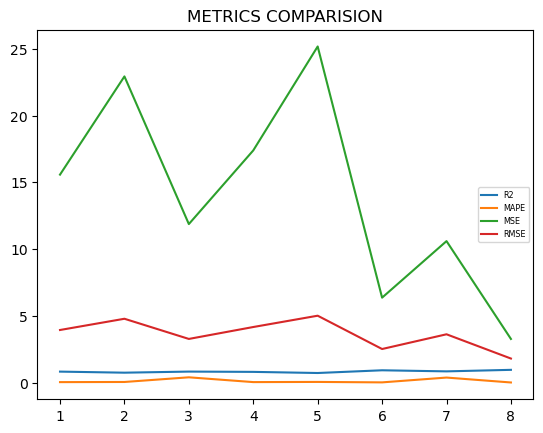

In [81]:
alg = ['1','2','3','4','5', '6','7', '8']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
legend = ['R2', 'MAPE', 'MSE', 'RMSE']

plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [24]:
X = good_df.drop(["life_expectancy", 'country'], axis=1)
#обучим модель на все данные 
alll = X
alll_t= scaler.fit_transform(alll)
predict = model_2.predict(alll_t)

In [25]:
df_1 = pd.DataFrame({'life_expectancy': list(good_df['life_expectancy']), 'predictions': predict})
df_1

,life_expectancy,predictions
0,60.0,60.682414
1,60.0,60.832333
2,60.0,61.008567
3,55.0,54.629690
4,55.0,53.181908
...,...,...
2321,59.0,59.353535
2322,58.0,58.418442
2323,57.0,55.640405
2324,55.0,51.787483


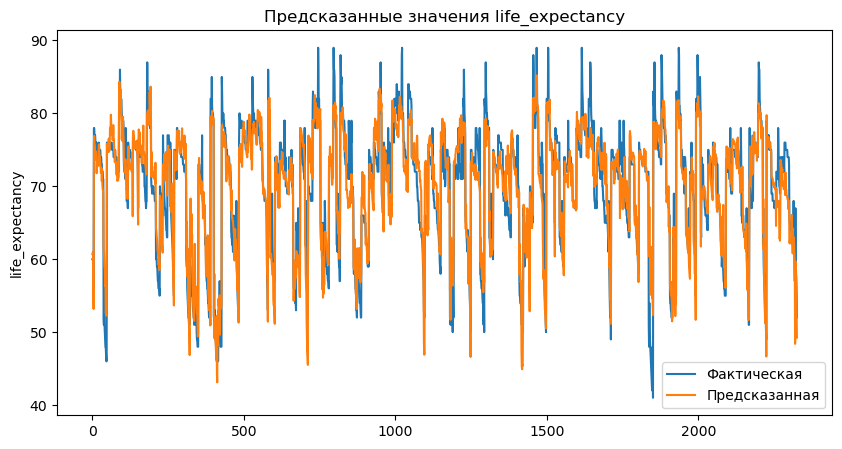

In [27]:
plt.figure(figsize=(10, 5)) 
sns.lineplot(data=df_1['life_expectancy']).set(title=f'Фактические значения life_expectancy')
sns.lineplot(data=df_1['predictions']).set(title=f'Предсказанные значения life_expectancy')
plt.legend(('Фактическая', 'Предсказанная'))
plt.show()

In [156]:
X = good_df.drop(["life_expectancy"], axis=1)
#обучим модель на все данные 
alll = X
alll_t= scaler.fit_transform(alll)
predict = model_8.predict(alll_t)

In [157]:
df_1 = pd.DataFrame({'life_expectancy': list(good_df['life_expectancy']), 'predictions': predict})
df_1

,life_expectancy,predictions
0,60.0,60.147602
1,60.0,59.510934
2,60.0,60.094937
3,55.0,54.767315
4,55.0,54.036697
...,...,...
2321,59.0,58.175905
2322,58.0,57.311418
2323,57.0,54.251263
2324,55.0,53.503322


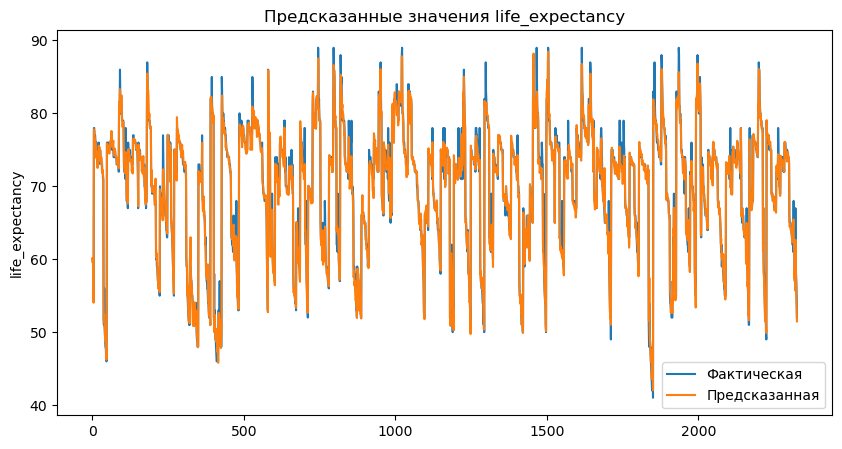

In [158]:
plt.figure(figsize=(10, 5)) 
sns.lineplot(data=df_1['life_expectancy']).set(title=f'Фактические значения life_expectancy')
sns.lineplot(data=df_1['predictions']).set(title=f'Предсказанные значения life_expectancy')
plt.legend(('Фактическая', 'Предсказанная'))
plt.show()